# WeatherPy >>> Solved
----

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
#More dependencies
#Import random to generate random lat & long
import random
#WeatherMap Api
import openweathermapy as owm
from datetime import datetime
import csv

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
#Import API Key
from config import api_key

In [15]:
#Create Dictionary with Info we're Interested 
settings = {"units": "imperial", "appid": api_key}

In [16]:
#Create DataFrame to Store Data from API Calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [17]:
# counter to count the number of calls to API
count = 1 
# error count to record how many cities the API responds back with no data.
err = 0 
# counter to count the number of call sets
sets = 0
# index for the data frame WeatherPy data frame
index = 0 
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3


/Users/ixmx1804/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ixmx1804/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ixmx1804/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ixmx1804/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/ixmx1804/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or 

Processing Record 2 of Set 0 | taolanaro
http://api.openweathermap.org/data/2.5/weather?q=taolanaro&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
HTTP Error 404: Not Found
Processing Record 3 of Set 0 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?q=puerto%20ayora&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 4 of Set 0 | meyungs
http://api.openweathermap.org/data/2.5/weather?q=meyungs&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
HTTP Error 404: Not Found
Processing Record 5 of Set 0 | xuanhua
http://api.openweathermap.org/data/2.5/weather?q=xuanhua&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 6 of Set 0 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?q=deputatskiy&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 7 of Set 0 | grants
http://api.openweathermap.org/data/2.5/weather?q=grants&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 8 of Set

Processing Record 5 of Set 1 | victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 6 of Set 1 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?q=vilyuysk&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 7 of Set 1 | trincomalee
http://api.openweathermap.org/data/2.5/weather?q=trincomalee&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 8 of Set 1 | luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 9 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 10 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?q=saint-philippe&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 11 of Set 1 | le port
http://api.openweathermap.org/data/

Processing Record 9 of Set 2 | konevo
http://api.openweathermap.org/data/2.5/weather?q=konevo&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 10 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?q=east%20london&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 11 of Set 2 | kapit
http://api.openweathermap.org/data/2.5/weather?q=kapit&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 12 of Set 2 | sistranda
http://api.openweathermap.org/data/2.5/weather?q=sistranda&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 13 of Set 2 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?q=jacareacanga&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 14 of Set 2 | port lincoln
http://api.openweathermap.org/data/2.5/weather?q=port%20lincoln&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 15 of Set 2 | anloga
http://api.openweathermap.

Processing Record 11 of Set 3 | palauig
http://api.openweathermap.org/data/2.5/weather?q=palauig&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 12 of Set 3 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?q=qaqortoq&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 13 of Set 3 | rassvet
http://api.openweathermap.org/data/2.5/weather?q=rassvet&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 14 of Set 3 | faya
http://api.openweathermap.org/data/2.5/weather?q=faya&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 15 of Set 3 | ambon
http://api.openweathermap.org/data/2.5/weather?q=ambon&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 16 of Set 3 | horst
http://api.openweathermap.org/data/2.5/weather?q=horst&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 17 of Set 3 | vanavara
http://api.openweathermap.org/data/2.5/weather?q=vanavara&units=i

Processing Record 15 of Set 4 | lumeje
http://api.openweathermap.org/data/2.5/weather?q=lumeje&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 16 of Set 4 | champerico
http://api.openweathermap.org/data/2.5/weather?q=champerico&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 17 of Set 4 | darab
http://api.openweathermap.org/data/2.5/weather?q=darab&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 18 of Set 4 | praia
http://api.openweathermap.org/data/2.5/weather?q=praia&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 19 of Set 4 | saint george
http://api.openweathermap.org/data/2.5/weather?q=saint%20george&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 20 of Set 4 | omsukchan
http://api.openweathermap.org/data/2.5/weather?q=omsukchan&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 21 of Set 4 | omboue
http://api.openweathermap.org/data/2.5/weat

Processing Record 18 of Set 5 | nioro
http://api.openweathermap.org/data/2.5/weather?q=nioro&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 19 of Set 5 | kununurra
http://api.openweathermap.org/data/2.5/weather?q=kununurra&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 20 of Set 5 | motygino
http://api.openweathermap.org/data/2.5/weather?q=motygino&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 21 of Set 5 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?q=sao%20jose%20da%20coroa%20grande&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 22 of Set 5 | baykit
http://api.openweathermap.org/data/2.5/weather?q=baykit&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 23 of Set 5 | cayenne
http://api.openweathermap.org/data/2.5/weather?q=cayenne&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 24 of Set 5 | lethem
http://api.op

Processing Record 21 of Set 6 | ilhabela
http://api.openweathermap.org/data/2.5/weather?q=ilhabela&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 22 of Set 6 | tara
http://api.openweathermap.org/data/2.5/weather?q=tara&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 23 of Set 6 | yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 24 of Set 6 | camacupa
http://api.openweathermap.org/data/2.5/weather?q=camacupa&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 25 of Set 6 | tuatapere
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 26 of Set 6 | hobyo
http://api.openweathermap.org/data/2.5/weather?q=hobyo&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 27 of Set 6 | letlhakane
http://api.openweathermap.org/data/2.5/weather?q=letlha

Processing Record 25 of Set 7 | avera
http://api.openweathermap.org/data/2.5/weather?q=avera&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 26 of Set 7 | grand river south east
http://api.openweathermap.org/data/2.5/weather?q=grand%20river%20south%20east&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
HTTP Error 404: Not Found
Processing Record 27 of Set 7 | acara
http://api.openweathermap.org/data/2.5/weather?q=acara&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
HTTP Error 404: Not Found
Processing Record 28 of Set 7 | ouahigouya
http://api.openweathermap.org/data/2.5/weather?q=ouahigouya&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 29 of Set 7 | husavik
http://api.openweathermap.org/data/2.5/weather?q=husavik&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 30 of Set 7 | sur
http://api.openweathermap.org/data/2.5/weather?q=sur&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Recor

Processing Record 27 of Set 8 | shahrud
http://api.openweathermap.org/data/2.5/weather?q=shahrud&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 28 of Set 8 | savelugu
http://api.openweathermap.org/data/2.5/weather?q=savelugu&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 29 of Set 8 | sambava
http://api.openweathermap.org/data/2.5/weather?q=sambava&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 30 of Set 8 | vicente guerrero
http://api.openweathermap.org/data/2.5/weather?q=vicente%20guerrero&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 31 of Set 8 | boa viagem
http://api.openweathermap.org/data/2.5/weather?q=boa%20viagem&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 32 of Set 8 | saleaula
http://api.openweathermap.org/data/2.5/weather?q=saleaula&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
HTTP Error 404: Not Found
Processing Record 33 of Set 8 | bulg

Processing Record 30 of Set 9 | grindavik
http://api.openweathermap.org/data/2.5/weather?q=grindavik&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 31 of Set 9 | riyadh
http://api.openweathermap.org/data/2.5/weather?q=riyadh&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 32 of Set 9 | bubaque
http://api.openweathermap.org/data/2.5/weather?q=bubaque&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 33 of Set 9 | alihe
http://api.openweathermap.org/data/2.5/weather?q=alihe&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 34 of Set 9 | birjand
http://api.openweathermap.org/data/2.5/weather?q=birjand&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 35 of Set 9 | martapura
http://api.openweathermap.org/data/2.5/weather?q=martapura&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 36 of Set 9 | palmer
http://api.openweathermap.org/data/2.5/weather?q=palm

Processing Record 33 of Set 10 | seabra
http://api.openweathermap.org/data/2.5/weather?q=seabra&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 34 of Set 10 | kolyvan
http://api.openweathermap.org/data/2.5/weather?q=kolyvan&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 35 of Set 10 | lensk
http://api.openweathermap.org/data/2.5/weather?q=lensk&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 36 of Set 10 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?q=ugoofaaru&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 37 of Set 10 | tezu
http://api.openweathermap.org/data/2.5/weather?q=tezu&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 38 of Set 10 | rudnichnyy
http://api.openweathermap.org/data/2.5/weather?q=rudnichnyy&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 39 of Set 10 | bykovo
http://api.openweathermap.org/data/2.5/weather?q=b

Processing Record 36 of Set 11 | yanji
http://api.openweathermap.org/data/2.5/weather?q=yanji&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 37 of Set 11 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 38 of Set 11 | nuuk
http://api.openweathermap.org/data/2.5/weather?q=nuuk&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 39 of Set 11 | sobolevo
http://api.openweathermap.org/data/2.5/weather?q=sobolevo&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 40 of Set 11 | bail hongal
http://api.openweathermap.org/data/2.5/weather?q=bail%20hongal&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 41 of Set 11 | kachiry
http://api.openweathermap.org/data/2.5/weather?q=kachiry&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 42 of Set 11 | vanimo
http://api.openweathermap.org/data

Processing Record 39 of Set 12 | halalo
http://api.openweathermap.org/data/2.5/weather?q=halalo&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
HTTP Error 404: Not Found
Processing Record 40 of Set 12 | kazalinsk
http://api.openweathermap.org/data/2.5/weather?q=kazalinsk&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
HTTP Error 404: Not Found
Processing Record 41 of Set 12 | oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?q=oktyabrskoye&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 42 of Set 12 | jurilovca
http://api.openweathermap.org/data/2.5/weather?q=jurilovca&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 43 of Set 12 | tessalit
http://api.openweathermap.org/data/2.5/weather?q=tessalit&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Record 44 of Set 12 | kuandian
http://api.openweathermap.org/data/2.5/weather?q=kuandian&units=imperial&APPID=72281b30332f8b81c3087397bf9791c3
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Display the count of cities with weather data
WeatherPy_df.count()

City          586
Cloudiness    586
Country       586
Date          586
Max Temp      586
Wind Speed    586
Lat           586
Lng           586
Humidity      586
dtype: int64

In [19]:
# save to csv 
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Hermanus,0,ZA,1554170489,57,5.86,-34.42,19.24,92
1,Puerto Ayora,32,EC,1554170430,80.01,5.41,-0.74,-90.35,93
2,Xuanhua,0,CN,1554170678,45.7,3.74,40.61,115.04,31
3,Deputatskiy,0,RU,1554170678,16.27,7.54,69.3,139.9,77
4,Grants,1,US,1554168900,48.2,3.74,35.15,-107.85,42
5,Punta Arenas,90,CL,1554169947,50,9.17,-53.16,-70.91,93
6,Arshan,0,YE,1554170679,49.03,3.96,14.32,46.95,83
7,New Norfolk,75,AU,1554170595,64,10.29,-42.78,147.06,48
8,Ushuaia,75,AR,1554166800,51.8,2.24,-54.81,-68.31,87
9,Rikitea,0,PF,1554170600,76.12,16.71,-23.12,-134.97,100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

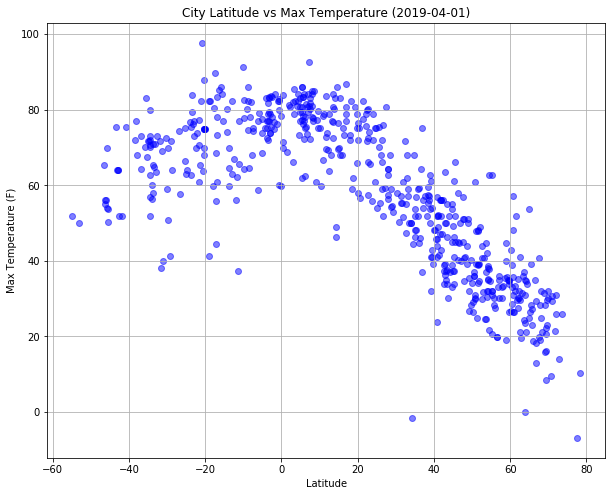

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

In [34]:
#### Latitude vs. Humidity Plot

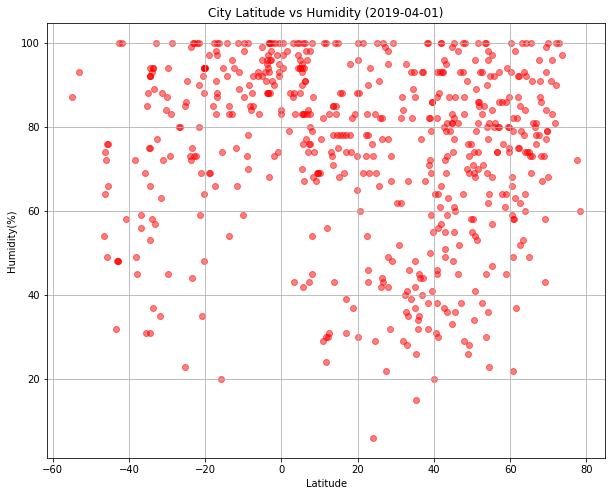

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.grid(True)
plt.savefig("LatVsHumidity.png")
plt.show()

### Latitude vs Cloudiness Plot 

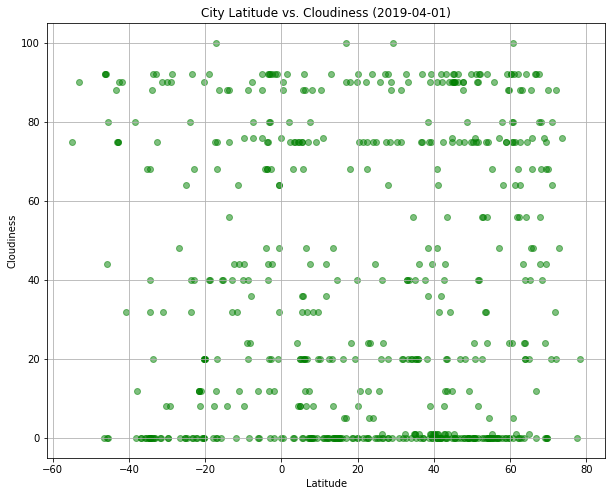

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='g', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
plt.savefig("LatvsCloudiness.png")

In [40]:
#### Latitude vs. Wind Speed Plot

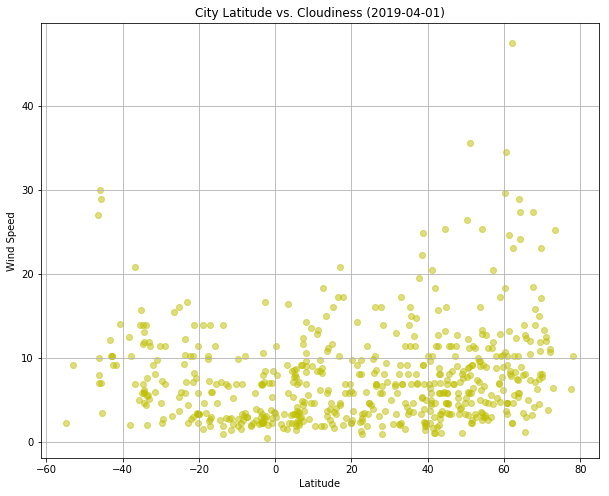

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='y', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
plt.savefig("LatvsWindSpeed.png")

In [45]:
# Analysis

In [ ]:
1. The City Latitude vs. Max Temperature proves that, closer to the Ecuator temperature tends to be higher. However, its interesting to see that the hottest city is in the southern hemisphere, about -21º from the Ecuator. 
2. Many cities seem to share cloudiness conditions, disregarding their position from the Ecuator. 
3. Wind Speed for most cities ranges between zero and 20MPH; wind tends to be faster in the Northern hemisphere. Only three of the analyzed cities have wind speed conditions equal or above 30MPH. Only a city, located in northern hemisphere, but not in the northest part, present wind speed conditions above 40MPH. 